In [1]:
from imvc.ampute import Amputer
from imvc.utils import DatasetUtils
from imvc.impute import get_observed_view_indicator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'imvc.ampute'

In [ ]:
from tueplots import axes, bundles
plt.rcParams.update({**bundles.icml2022(), **axes.lines()})

In [47]:
RANDOM_STATE = 42
n_views = 5
n_samples = 1000
Xs = [pd.DataFrame(np.random.default_rng(RANDOM_STATE).random((n_samples, 10))) for i in range(n_views)]
samples_dict = {}
xlabel,ylabel = "Modality", "Samples"

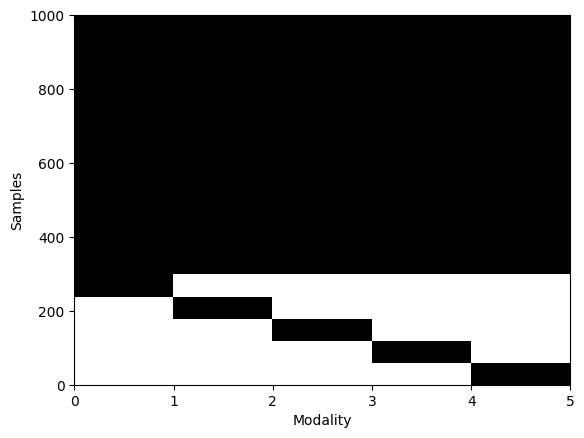

In [48]:
mechanism = "EDM"
transformed_Xs = Amputer(mechanism=mechanism, p=0.3, random_state=RANDOM_STATE).fit_transform(Xs)
observed_view_indicator = get_observed_view_indicator(transformed_Xs).sort_values(list(range(len(transformed_Xs))))
plt.pcolor(observed_view_indicator, cmap="binary")
plt.xlabel(xlabel), plt.ylabel(ylabel)
samples_dict[mechanism] = {
    "Complete samples": DatasetUtils.get_n_complete_samples(transformed_Xs),
    "Incomplete samples": DatasetUtils.get_n_incomplete_samples(transformed_Xs),
    "Observed samples in view": [len(Xs[0]) - len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
    "Missing samples in view": [len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
}

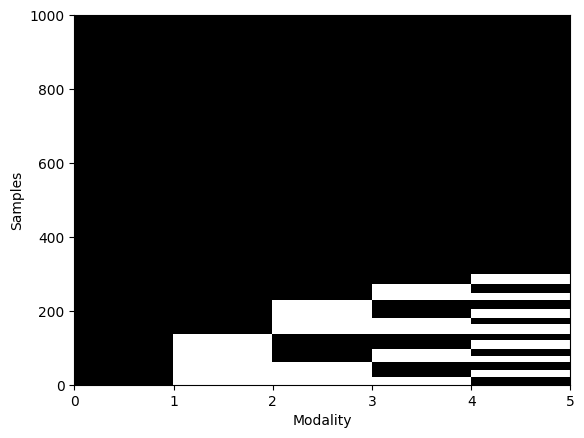

In [49]:
mechanism = "PM"
transformed_Xs = Amputer(mechanism=mechanism, p=0.3, random_state=RANDOM_STATE).fit_transform(Xs)
observed_view_indicator = get_observed_view_indicator(transformed_Xs).sort_values(list(range(len(transformed_Xs))))
plt.pcolor(observed_view_indicator, cmap="binary")
plt.xlabel(xlabel), plt.ylabel(ylabel)
samples_dict[mechanism] = {
    "Complete samples": DatasetUtils.get_n_complete_samples(transformed_Xs),
    "Incomplete samples": DatasetUtils.get_n_incomplete_samples(transformed_Xs),
    "Observed samples in view": [len(Xs[0]) - len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
    "Missing samples in view": [len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
}

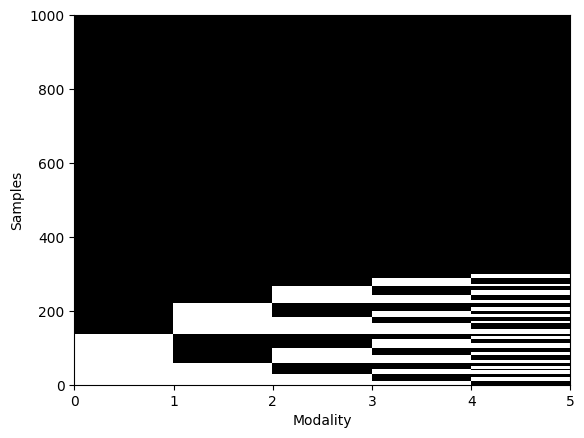

In [50]:
mechanism = "MCAR"
transformed_Xs = Amputer(mechanism=mechanism, p=0.3, random_state=RANDOM_STATE).fit_transform(Xs)
observed_view_indicator = get_observed_view_indicator(transformed_Xs).sort_values(list(range(len(transformed_Xs))))
plt.pcolor(observed_view_indicator, cmap="binary")
plt.xlabel(xlabel), plt.ylabel(ylabel)
samples_dict[mechanism] = {
    "Complete samples": DatasetUtils.get_n_complete_samples(transformed_Xs),
    "Incomplete samples": DatasetUtils.get_n_incomplete_samples(transformed_Xs),
    "Observed samples in view": [len(Xs[0]) - len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
    "Missing samples in view": [len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
}

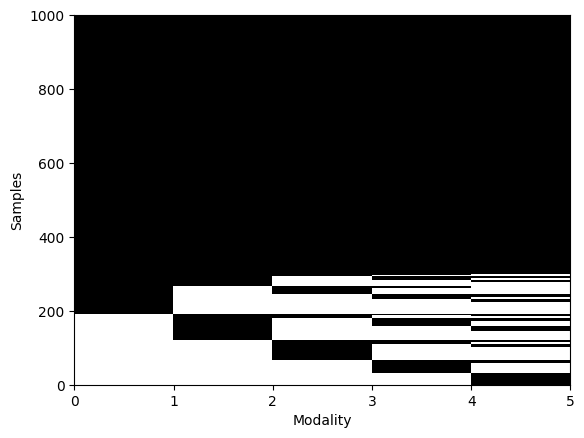

In [52]:
mechanism = "MNAR"
transformed_Xs = Amputer(mechanism=mechanism, p=0.3, random_state=RANDOM_STATE).fit_transform(Xs)
observed_view_indicator = get_observed_view_indicator(transformed_Xs).sort_values(list(range(len(transformed_Xs))))
plt.pcolor(observed_view_indicator, cmap="binary")
plt.xlabel(xlabel), plt.ylabel(ylabel)
samples_dict[mechanism] = {
    "Complete samples": DatasetUtils.get_n_complete_samples(transformed_Xs),
    "Incomplete samples": DatasetUtils.get_n_incomplete_samples(transformed_Xs),
    "Observed samples in view": [len(Xs[0]) - len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
    "Missing samples in view": [len(X_id) for X_id in DatasetUtils.get_missing_samples_by_view(transformed_Xs)],
}

In [53]:
pd.DataFrame.from_dict(samples_dict, orient= "index")

,Complete samples,Incomplete samples,Observed samples in view,Missing samples in view
EDM,700,300,"[760, 760, 760, 760, 760]","[240, 240, 240, 240, 240]"
PM,700,300,"[1000, 861, 845, 858, 844]","[0, 139, 155, 142, 156]"
MCAR,700,300,"[861, 856, 838, 844, 858]","[139, 144, 162, 156, 142]"
MAR,700,300,"[803, 785, 812, 795, 811]","[197, 215, 188, 205, 189]"
MNAR,700,300,"[806, 804, 793, 800, 806]","[194, 196, 207, 200, 194]"
